In [3]:
import pandas as pd
import numpy as np
from preprocessing import preprocess_data
from sklearn.preprocessing import LabelEncoder
from notebooks_classification.classification import compute_classifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier



## Data importation

In [4]:
df = pd.read_csv('../data/Spotify_train_dataset.csv')

features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']
label = ['genre']

## Preprocess

### Without Strandardization

In [6]:
df_normal, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=False)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


### With Strandardization

In [5]:
df_stand, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=True)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


### Basic Model

In [13]:
print("KNN classifier basic param")
KNN = KNeighborsClassifier()
print("Without Standardization : ")
y_pred_normal = compute_classifier(df_normal, labels_encoded, KNN)
print("\nWith Standardization : ")
y_pred_stand = compute_classifier(df_stand, labels_encoded, KNN)
print(classification_report(labels_encoded, y_pred_stand, target_names=le.classes_))

KNN classifier basic param
Without Standardization : 
Accuracy : 0.29210791729702473

With Standardization : 
Accuracy : 0.5531076651538074
                 precision    recall  f1-score   support

      Dark Trap       0.36      0.41      0.39      3378
            Emo       0.48      0.54      0.51      1262
         Hiphop       0.34      0.36      0.35      2255
            Pop       0.15      0.09      0.12       336
            Rap       0.35      0.31      0.33      1420
            RnB       0.29      0.21      0.25      1605
     Trap Metal       0.26      0.15      0.19      1474
Underground Rap       0.38      0.38      0.38      4378
            dnb       0.88      0.92      0.90      2213
      hardstyle       0.61      0.75      0.67      2178
      psytrance       0.75      0.84      0.79      2214
      techhouse       0.77      0.80      0.79      2254
         techno       0.76      0.80      0.78      2226
         trance       0.69      0.60      0.64      2275
    

In [14]:
N_list = [1, 5, 10, 15, 20, 21, 22, 23, 24, 25, 50]
for N in N_list :
    print("N of neighbors : " + str(N))
    KNN = KNeighborsClassifier(n_neighbors=N)
    y_pred_stand = compute_classifier(df_stand, labels_encoded, KNN)


N of neighbors : 1
Accuracy : 0.5237014624306606
N of neighbors : 5
Accuracy : 0.5531076651538074
N of neighbors : 10
Accuracy : 0.5675428643469491
N of neighbors : 15
Accuracy : 0.5765254664649521
N of neighbors : 20
Accuracy : 0.5770612708018155
N of neighbors : 21
Accuracy : 0.5775025214321735
N of neighbors : 22
Accuracy : 0.5776285930408472
N of neighbors : 23
Accuracy : 0.577250378214826
N of neighbors : 24
Accuracy : 0.5773449319213313
N of neighbors : 25
Accuracy : 0.5761472516389309
N of neighbors : 50
Accuracy : 0.5700327786182552


In [15]:
print("change type of distances")
p = [1, 2, 3, 4, 5]
for e in p :
    print("distance type : " + str(e))
    KNN = KNeighborsClassifier(n_neighbors=22, p=e)
    y_pred_stand = compute_classifier(df_stand, labels_encoded, KNN)

change type of distances
distance type : 1
Accuracy : 0.600321482602118
distance type : 2
Accuracy : 0.5776285930408472
distance type : 3
Accuracy : 0.5664712556732224
distance type : 4
Accuracy : 0.5578038325769037
distance type : 5
Accuracy : 0.5536434694906707


In [16]:
N_list = [1, 5, 10, 15, 20, 21, 22, 23, 24, 25, 50]
for N in N_list :
    print("N of neighbors : " + str(N))
    KNN = KNeighborsClassifier(n_neighbors=N, p=1)
    y_pred_stand = compute_classifier(df_stand, labels_encoded, KNN)

N of neighbors : 1
Accuracy : 0.5338817448310641
N of neighbors : 5
Accuracy : 0.5695915279878971
N of neighbors : 10
Accuracy : 0.5884077155824509
N of neighbors : 15
Accuracy : 0.5969490670700958
N of neighbors : 20
Accuracy : 0.5995335350479072
N of neighbors : 21
Accuracy : 0.5992813918305597
N of neighbors : 22
Accuracy : 0.600321482602118
N of neighbors : 23
Accuracy : 0.6006366616238024
N of neighbors : 24
Accuracy : 0.6011724659606656
N of neighbors : 25
Accuracy : 0.6015506807866868
N of neighbors : 50
Accuracy : 0.5989662128088754


In [17]:
print("KNN classifier optimized param")
KNN = KNeighborsClassifier(n_neighbors=24, p=1)
y_pred_stand = compute_classifier(df_stand, labels_encoded, KNN)
print(classification_report(labels_encoded, y_pred_stand, target_names=le.classes_))

KNN classifier optimized param
Accuracy : 0.6011724659606656
                 precision    recall  f1-score   support

      Dark Trap       0.50      0.37      0.43      3378
            Emo       0.54      0.53      0.54      1262
         Hiphop       0.44      0.35      0.39      2255
            Pop       0.28      0.05      0.09       336
            Rap       0.53      0.25      0.34      1420
            RnB       0.36      0.25      0.29      1605
     Trap Metal       0.42      0.14      0.21      1474
Underground Rap       0.41      0.63      0.50      4378
            dnb       0.86      0.93      0.89      2213
      hardstyle       0.60      0.83      0.70      2178
      psytrance       0.76      0.87      0.81      2214
      techhouse       0.77      0.84      0.80      2254
         techno       0.76      0.83      0.80      2226
         trance       0.70      0.68      0.69      2275
           trap       0.71      0.69      0.70      2260

       accuracy          

In [8]:
from sklearn.ensemble import BaggingClassifier
print("KNN classifier with bagging")
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=24, p=1), max_samples=0.5, max_features=0.5)
y_pred_stand = compute_classifier(df_stand, labels_encoded, bagging)

KNN classifier with bagging
Accuracy : 0.6048600605143721


In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
bag = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
y_pred_stand = compute_classifier(df_stand, labels_encoded, bag)

Accuracy : 0.6504349470499243


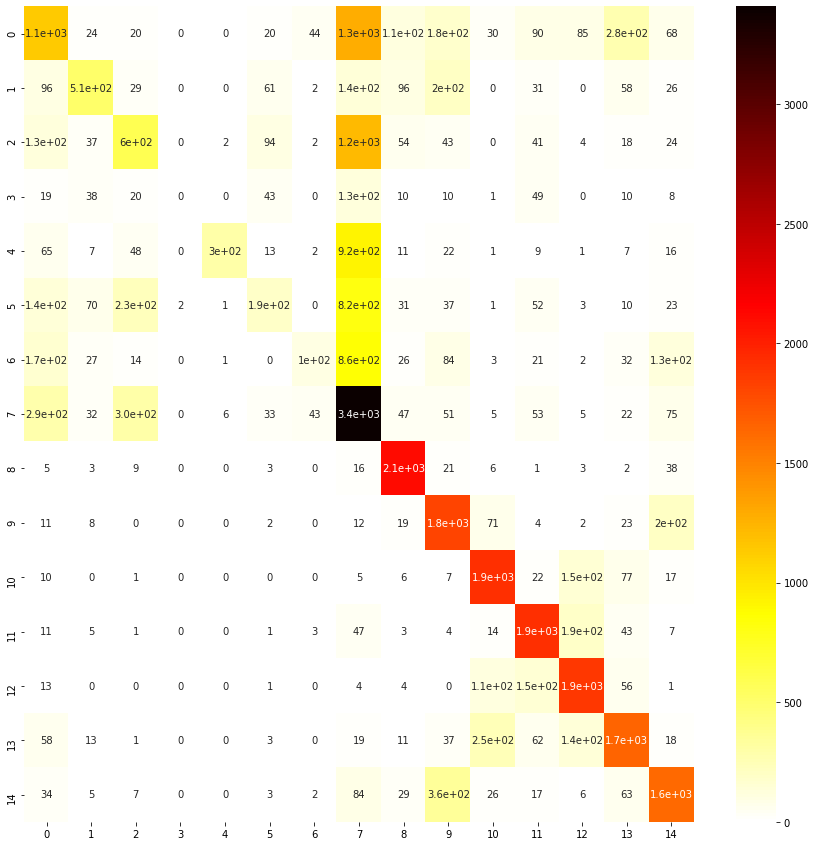

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(labels_encoded, y_pred_stand)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='hot_r')
plt.show()